## Introduction 

*Project description*

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?
You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

## Import Library

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataframe

In [2]:
data = pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
data.head(30)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
data[data['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [6]:
total_rows = 9651
null_val = (data['chain'].isna().sum() / total_rows)*100
null_val

0.031084861672365557

Missing Chain Values: The three rows with missing chain values are:

- Row 7408: Taqueria Los 3 Carnales at 5000 E Whittier Blvd, with object_type 'Restaurant' and number 14.
- Row 7523: Jammin Jimmy's Pizza at 1641 Firestone Blvd, with object_type 'Pizza' and number 1.
- Row 8648: The Lexington Theater at 129 E 3rd St, with object_type 'Restaurant' and number 35.

Percentage of Missing Values: The percentage of missing values in the 'chain' column is calculated as (3 / 9,651) * 100, which results in 0.031%.

Based on the above analysis, we can conclude that the 'chain' column has a very low percentage of missing values (0.031%), indicating that the majority of the entries have information regarding whether the restaurant is part of a chain or not.

## Enrich data

Since this missing values has no meaningful to our analysis, we will drop the data.

In [7]:
# Drop rows containing NaN in the 'chain' column
data = data.dropna(subset=['chain'])

# Verify the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


In [8]:
null_val = (data['chain'].isna().sum() / total_rows)*100
null_val

0.0

## Step 2 - Data analysis


### investigate the proportions of the various types of establishments

To investigate the proportions of the various types of establishments in the provided DataFrame, we can use the value_counts() method on the 'object_type' column. This will give us the count of each unique establishment type. We can then calculate the proportions by dividing each count by the total number of establishments.

In [9]:
# Assuming your DataFrame is named 'data'
establishment_counts = data['object_type'].value_counts()
total_establishments = len(data)

# Calculate the proportions
establishment_proportions = establishment_counts / total_establishments

# Print the proportions
print(establishment_proportions)

Restaurant    0.751762
Fast Food     0.110489
Cafe          0.045087
Pizza         0.033064
Bar           0.030265
Bakery        0.029333
Name: object_type, dtype: float64


We create a pie chart to visually represent the proportions of the various types of establishments in the DataFrame

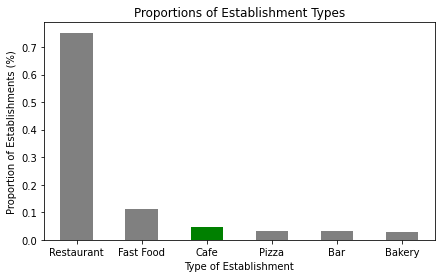

In [44]:
establishment_counts = data['object_type'].value_counts(normalize=True)

color = ["green" if r_type == "Cafe" else "grey" for r_type in establishment_counts.index]

plt.figure(figsize=[7, 4])
establishment_counts.plot(kind='bar', color=color)
plt.title('Proportions of Establishment Types')
plt.xlabel('Type of Establishment')
plt.ylabel('Proportion of Establishments (%)')
plt.xticks(rotation=0)
plt.show()

Based on the proportions of establishment types in the provided DataFrame, we can draw the following conclusions and findings:

- Restaurants dominate the dataset: The most prevalent establishment type is "Restaurant," accounting for approximately 75.2% of all establishments. This indicates that restaurants are the most common type of establishment in LA.

- Fast Food establishments are the second most common: Fast food establishments make up about 11.0% of the dataset. While not as prevalent as restaurants, fast food establishments still represent a significant portion of the establishments.

- Cafes, Pizzas, Bars, and Bakeries have smaller shares: Cafes account for approximately 4.5% of the establishments, while Pizzas, Bars, and Bakeries have proportions of around 3.3%, 3.0%, and 2.9%, respectively. These establishment types have relatively smaller shares compared to restaurants and fast food establishments.

- Diverse range of establishment types: The presence of different establishment types suggests a diverse dining landscape. This variety may provide options catering to different preferences and culinary experiences.

### Investigate the proportions of chain and nonchain establishments.

To investigate the proportions of chain and non-chain establishments in the provided DataFrame, we can use the value_counts() method on the 'chain' column. This will give us the count of each unique value, which in this case are True and False. We can then calculate the proportions by dividing each count by the total number of establishments.

In [12]:
chain_counts = data['chain'].value_counts()
total_establishments = len(data)

# Calculate the proportions
chain_proportions = chain_counts / total_establishments

# Print the proportions
print(chain_proportions)

False    0.618988
True     0.381012
Name: chain, dtype: float64


To visualize the proportions of chain and non-chain establishments in the DataFrame, We can use a bar chart. 

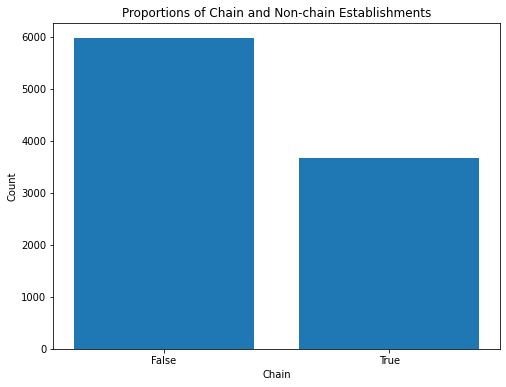

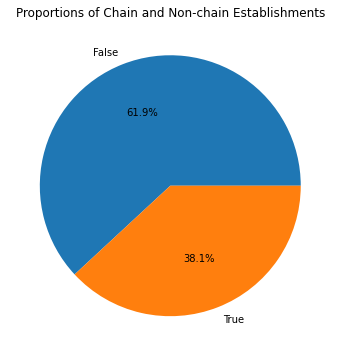

In [13]:
chain_counts = data['chain'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(chain_counts.index.astype(str), chain_counts)
plt.xlabel('Chain')
plt.ylabel('Count')
plt.title('Proportions of Chain and Non-chain Establishments')

# Display the chart
plt.show()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(chain_counts, labels=chain_counts.index, autopct='%1.1f%%')
plt.title('Proportions of Chain and Non-chain Establishments')

# Display the chart
plt.show()

Based on the proportions of chain and non-chain establishments in the provided DataFrame, we can draw the following conclusions and findings:

- Non-chain establishments are more prevalent: The proportion of non-chain establishments is approximately 61.9% (0.618796). This indicates that the majority of establishments in the dataset are independent and not part of a chain.

- Chain establishments make up a significant portion: The proportion of chain establishments is around 38.1% (0.380893). Although slightly less common than non-chain establishments, chain establishments still represent a significant portion of the dataset.


### Which type of establishment is typically a chain?

To determine which type of establishment is typically a chain based on the provided DataFrame, we can analyze the relationship between the 'chain' column and the 'object_type' column. We can calculate the proportions of chain establishments for each establishment type and identify the type with the highest proportion of chain establishments.

In [14]:
chain_establishments = data[data['chain'] == True]
chain_proportions_by_type = chain_establishments['object_type'].value_counts(normalize=True)
chain_proportions_by_type

Restaurant    0.623504
Fast Food     0.164581
Bakery        0.076986
Cafe          0.072361
Pizza         0.041621
Bar           0.020947
Name: object_type, dtype: float64

In [15]:
# Find the type with the highest proportion of chain establishments
most_common_chain_type = chain_proportions_by_type.idxmax()

# Print the most common chain establishment type
print("The type of establishment typically a chain: ", most_common_chain_type)

The type of establishment typically a chain:  Restaurant


We create a pie chart representing the overview proportions of chain establishments by establishment type.

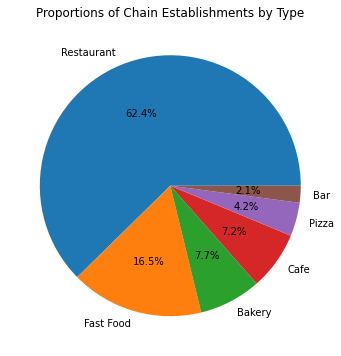

In [16]:
labels = chain_proportions_by_type.index
proportions = chain_proportions_by_type.values

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', normalize=False)
plt.title('Proportions of Chain Establishments by Type')

# Display the chart
plt.show()

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

To determine whether chains in the provided DataFrame are characterized by many establishments with a small number of seats or a few establishments with a lot of seats, we can analyze the relationship between the 'chain' column and the 'number' column. We can compare the average number of seats for chain establishments and non-chain establishments to understand the seating patterns.

In [17]:
chain_establishments = data[data['chain'] == True]
non_chain_establishments = data[data['chain'] == False]

# Calculate the average number of seats for chain and non-chain establishments
avg_seats_chain = chain_establishments['number'].mean()
avg_seats_non_chain = non_chain_establishments['number'].mean()
print(avg_seats_chain)
print(avg_seats_non_chain )

39.69423286180631
46.17146684527796


In [18]:
# Determine the seating pattern characterization
if avg_seats_chain < avg_seats_non_chain:
    characterization = "Chains are characterized by many establishments with a small number of seats."
else:
    characterization = "Chains are characterized by a few establishments with a lot of seats."

# Print the seating pattern characterization
print("Characterization of Chains: ", characterization)

Characterization of Chains:  Chains are characterized by many establishments with a small number of seats.


To visualize and compare the seating patterns of chain establishments and non-chain establishments, a suitable chart is a grouped bar chart. This will allow for a clear visual comparison of the average number of seats between the two categories.

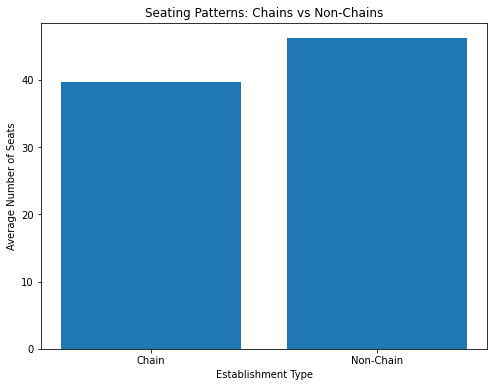

In [19]:
chain_establishments = data[data['chain'] == True]
non_chain_establishments = data[data['chain'] == False]

# Calculate the average number of seats for chain and non-chain establishments
avg_seats_chain = chain_establishments['number'].mean()
avg_seats_non_chain = non_chain_establishments['number'].mean()

# Create the grouped bar chart
categories = ['Chain', 'Non-Chain']
average_seats = [avg_seats_chain, avg_seats_non_chain]

plt.figure(figsize=(8, 6))
plt.bar(categories, average_seats)
plt.xlabel('Establishment Type')
plt.ylabel('Average Number of Seats')
plt.title('Seating Patterns: Chains vs Non-Chains')

# Display the chart
plt.show()

### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats?

To determine the average number of seats for each type of restaurant and identify the type of restaurant with the greatest average number of seats, we can group the data by the 'object_type' column and calculate the mean of the 'number' column within each group. 

In [20]:
average_seats_by_type = data.groupby('object_type')['number'].mean()
average_seats_by_type

object_type
Bakery        21.773852
Bar           44.767123
Cafe          25.000000
Fast Food     31.837711
Pizza         28.545455
Restaurant    48.048807
Name: number, dtype: float64

In [21]:
# Find the type of restaurant with the greatest average number of seats
restaurant_with_most_seats = average_seats_by_type.idxmax()

# Print the type of restaurant with the greatest average number of seats
print("Type of restaurant with the greatest average number of seats is", restaurant_with_most_seats)

Type of restaurant with the greatest average number of seats is Restaurant


To plot a graph representing the average number of seats for each type of restaurant, we can use a bar chart. This will allow for a visual comparison of the average number of seats across different restaurant types.

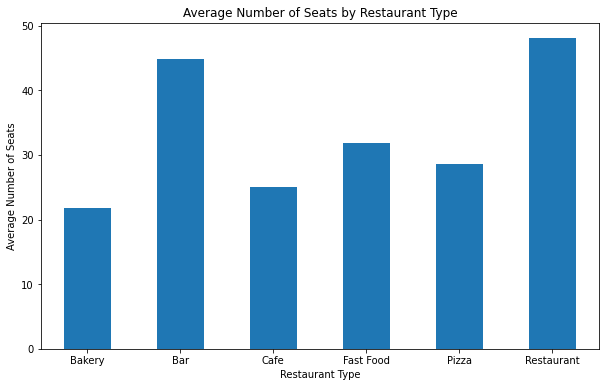

In [22]:
# Create the bar chart
plt.figure(figsize=(10, 6))
average_seats_by_type.plot(kind='bar')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Number of Seats')
plt.title('Average Number of Seats by Restaurant Type')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=0)

# Display the chart
plt.show()

Based on the analysis performed, we can draw the following conclusions:

- The average number of seats varies across different types of restaurants.
- The type of restaurant with the greatest average number of seats is "Restaurant."
- Restaurants, on average, have the highest seating capacity compared to other types of establishments in the dataset.
- Bars and Fast Food establishments also have relatively high average seating capacities.
- Cafes, Bakeries, and Pizzas places have lower average seating capacities compared to the other types of restaurants.

### Put the data on street names from the address column in a separate column.

To extract the street names from the 'address' column and put them into a separate column, we can use string manipulation techniques in pandas. We create a new column named 'street_name' to store the extracted street names.

In [23]:
data.head(11)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [24]:
import re
data['street_name'] = data['address'].replace('\d+\s','',regex=True)

# Print the updated DataFrame
display(data)

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY # 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


Check null values

In [25]:
data['street_name'].isna().sum()

0

Check the values for all columns

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
 6   street_name  9648 non-null   object
dtypes: int64(2), object(5)
memory usage: 603.0+ KB


### Plot a graph of the top ten streets by number of restaurants.

To do this, we can filter `object_type` by Restaurant and sort it by `street_name`.

In [27]:
top_ten_streets = data[data['object_type'] == 'Restaurant']['street_name'].value_counts().head(10)

# Print the top ten streets
display(top_ten_streets)

W PICO BLVD          218
W SUNSET BLVD        217
HOLLYWOOD BLVD       136
WILSHIRE BLVD        131
W 3RD ST             119
S VERMONT AVE        107
SANTA MONICA BLVD    107
W OLYMPIC BLVD       107
MELROSE AVE          106
BEVERLY BLVD         103
Name: street_name, dtype: int64

To plot a graph of the top ten streets by the number of restaurants, we can use the barh() function.

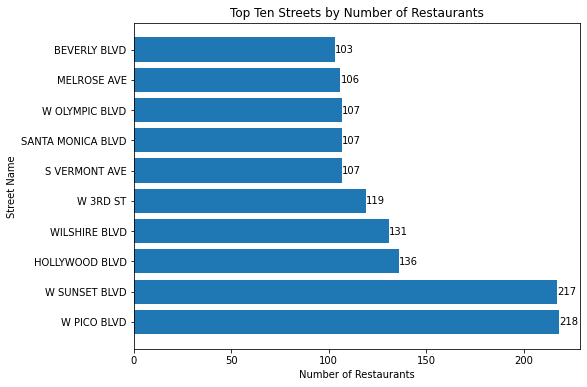

In [28]:
streets = top_ten_streets.index
restaurant_count = top_ten_streets.values

# Plotting the horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(streets, restaurant_count)

# Adding value annotations to the bars
for i, count in enumerate(restaurant_count):
    plt.text(count, i, str(count), ha='left', va='center')

# Labeling the axes and setting the title
plt.xlabel('Number of Restaurants')
plt.ylabel('Street Name')
plt.title('Top Ten Streets by Number of Restaurants')

# Displaying the plot
plt.show()

Based on the analysis and graph of the top ten streets by the number of restaurants, the following conclusions can be drawn:

- W PICO BLVD and W SUNSET BLVD are the top two streets with the highest number of restaurants, followed by HOLLYWOOD BLVD, WILSHIRE BLVD, and W 3RD ST.
- The concentration of restaurants on these streets suggests that they are popular dining destinations in the area.
- These streets likely attract a significant amount of foot traffic, making them desirable locations for restaurants.
- The presence of a high number of restaurants on these streets indicates a thriving food scene and potentially a diverse range of dining options.
- Businesses looking to open a restaurant or food-related establishment may consider these top streets as potential locations due to their existing dining infrastructure and customer traffic.

These streets have the highest concentration of restaurants, indicating that they are popular dining destinations. The presence of a large number of restaurants on these streets suggests a thriving food scene and potentially higher foot traffic, making them attractive locations for both locals and tourists. This information could be useful for analyzing restaurant trends, identifying competitive areas, or selecting potential locations for new restaurants or food-related businesses.

### Find the number of streets that only have one restaurant.

In [29]:
street_counts = data[data['object_type'] == 'Restaurant']['street_name'].value_counts()
streets_with_one_restaurant = street_counts[street_counts == 1]
streets_with_one_restaurant

BUNDY DR                   1
LINCOLN BLVD # 104         1
SANTA MONICA BLVD STE 1    1
W 3RD ST STE #742          1
S WESTERN AVE # 39         1
                          ..
S MAIN ST STE 404          1
S SPRING ST STE B          1
E FLORENCE AVE # C         1
OLVERA ST 5                1
N GRIFFITH PARK            1
Name: street_name, Length: 1995, dtype: int64

In [30]:
# Count the number of streets with only one restaurant
num_streets_with_one_restaurant = len(streets_with_one_restaurant)

# Print the result
print("Number of streets with only one restaurant:", num_streets_with_one_restaurant)

Number of streets with only one restaurant: 1995


Given the large number of streets with only one restaurant (1995 streets), creating a bar plot with all the streets might not be the most effective way to visualize the data. Instead, we can create a histogram to display the distribution of the number of restaurants per street.

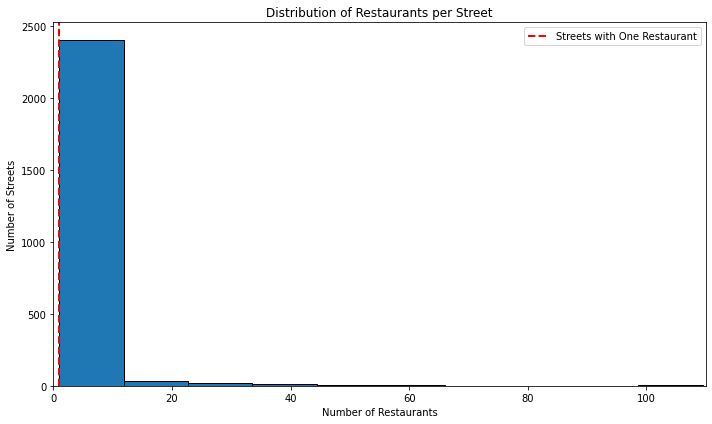

In [31]:
# Get the count of restaurants per street
restaurant_counts = data[data['object_type'] == 'Restaurant']['street_name'].value_counts()

# Filter streets with only one restaurant
streets_with_one_restaurant = restaurant_counts[restaurant_counts == 1]

# Get the count of streets with only one restaurant
num_streets_with_one_restaurant = len(streets_with_one_restaurant)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(restaurant_counts, bins=20, edgecolor='black')

plt.xlabel('Number of Restaurants')
plt.ylabel('Number of Streets')
plt.title('Distribution of Restaurants per Street')

# Add a vertical line to indicate streets with only one restaurant
plt.axvline(x=1, color='red', linestyle='dashed', linewidth=2, label='Streets with One Restaurant')

# Set x-axis limit to 110
plt.xlim(0, 110)

plt.legend()
plt.tight_layout()
plt.show()

Conclusion:
- There are a total of 1,995 streets in the dataset that have only one restaurant.
- The distribution of the number of restaurants per street shows that the majority of streets have a small number of restaurants.
- The histogram indicates that the most common scenario is one restaurant per street, as the bin with one restaurant has the highest frequency.
- The presence of a large number of streets with only one restaurant suggests a diverse distribution of restaurants across different streets rather than clustering in specific areas.
- These streets with only one restaurant might represent unique dining destinations or less crowded areas for restaurant establishments.
- The red dashed line in the histogram represents the threshold of streets with only one restaurant, highlighting their distinct count compared to streets with multiple restaurants.

### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

To analyze the distribution of the number of seats for streets with a lot of restaurants, we can focus on the streets with a high frequency of restaurants and examine the trends in their seating capacity.

In [32]:
restaurant_streets = data[data['object_type'] == 'Restaurant']['street_name']

# Select streets with a high frequency of restaurants
high_freq_streets = restaurant_streets.value_counts().head(3).index

# Filter the data for the selected streets
selected_data = data[data['street_name'].isin(high_freq_streets)]


In [33]:
selected_data_sorted = selected_data.sort_values(by='number', ascending=False)

In [34]:
selected_data_sorted.head()

,id,object_name,address,chain,object_type,number,street_name
5091,16877,BOULEVARD 3,6523 W SUNSET BLVD,False,Restaurant,229,W SUNSET BLVD
4626,16412,PLAYHOUSE,6506 HOLLYWOOD BLVD,False,Restaurant,229,HOLLYWOOD BLVD
8892,20678,LOWBOY,1536 W SUNSET BLVD,False,Restaurant,228,W SUNSET BLVD
2810,14596,BANQUET KITCHEN (2ND FLOOR),6250 HOLLYWOOD BLVD,False,Restaurant,222,HOLLYWOOD BLVD
4020,15806,AROMA BAKERY CAFE,7373 W SUNSET BLVD,True,Bakery,218,W SUNSET BLVD


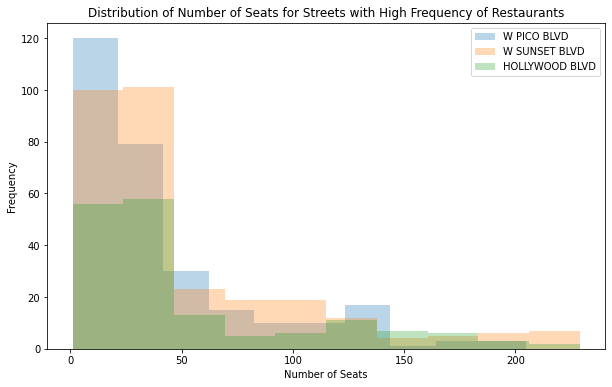

In [35]:
# Plot the distribution of the number of seats for each street
plt.figure(figsize=(10, 6))
for street in high_freq_streets:
    street_data = selected_data[selected_data['street_name'] == street]
    plt.hist(street_data['number'], bins=10, alpha=0.3, label=street)

plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Number of Seats for Streets with High Frequency of Restaurants')
plt.show()

Based on the provided data, we can observe the following trends:

- Sunset Blvd (W Sunset Blvd) and Hollywood Blvd are prominent streets with a high number of restaurants. These streets have the highest counts of restaurants, with Boulevard 3 on W Sunset Blvd and Playhouse on Hollywood Blvd having the highest number of 229.

- There is a mix of chain and non-chain establishments in the top restaurants on these streets. Both Boulevard 3 and Playhouse are non-chain restaurants, indicating that independent establishments can thrive in popular areas.

- The object types vary among the top restaurants on these streets. They include restaurants, bakeries, and even a banquet kitchen on the 2nd floor, showcasing a diverse culinary scene in these areas.

- The addresses of the restaurants suggest that they are located in popular and bustling areas, attracting a significant number of customers. This could indicate that these streets are desirable locations for food businesses.

- Overall, the trends suggest that Sunset Blvd and Hollywood Blvd are vibrant dining destinations, offering a range of restaurant options and attracting both chain and independent establishments. These streets are likely popular among locals and visitors alike for their diverse culinary experiences.

## Step 3 - Presentation Slide

Presentation: <https://1drv.ms/b/s!AnExurjMILz7omKlqqSB04lNZZD6?e=3T3TX7> 